## Python notebook 
V nasledujúcom notebooku sú popísané Python metódy použité pre natrénovanie a vizualizáciu SOM mapy. Obsah notebooku je nasledujúci:
1. Import potrebných knižníc
2. Predspracovanie dát
3. Vytvorenie SOM mapy
4. Vytvorenie výstupnej tauľky

# 1. Import potrebných knižníc

In [1]:
!pip install minisom
!pip install hyperopt

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.close('all')

from IPython.display import Image, display
import matplotlib.pyplot as plt
from minisom import MiniSom
import numpy as np
import pandas as pd
import time
import pickle

from pylab import plot, axis, show, pcolor, colorbar, bone

from hyperopt import fmin, tpe, hp
from hyperopt import Trials, STATUS_OK

from mpl_toolkits.axes_grid1 import ImageGrid

# 2. Predspracovanie dát
Dáta načítame a predspracujeme do podoby vhodne pre model SOM.

In [3]:
def train_som(x, y, input_len, sigma, learning_rate, seed):
    #init
    som = MiniSom(x=x,
             y=y,
             input_len=input_len,
             sigma=sigma,
             learning_rate=learning_rate, random_seed = seed)
    som.random_weights_init(data)
    #training
    start_time = time.time()
    som.train_random(data, iterations)
    elapsed_time = time.time()-start_time
    print(elapsed_time, " seconds")
    return som

In [4]:
#nacitam data na clustering
data = pickle.load(open('data/data_2014_11.pkl', 'rb'))
label = pickle.load(open('data/label_2014_11.pkl', 'rb'))
img_name = pickle.load(open('data/img_name.pkl', 'rb'))

In [5]:
data.shape

(13647, 150, 40, 3)

In [6]:
label.shape

(13647,)

In [7]:
som_data = (data - data.min()) / (data.max() - data.min())
som_data = som_data.reshape(13647, -1)
print(som_data[0])

[0.87058824 0.89019608 0.18431373 ... 0.         0.         0.        ]


In [8]:
target = label
som_data.shape

(13647, 18000)

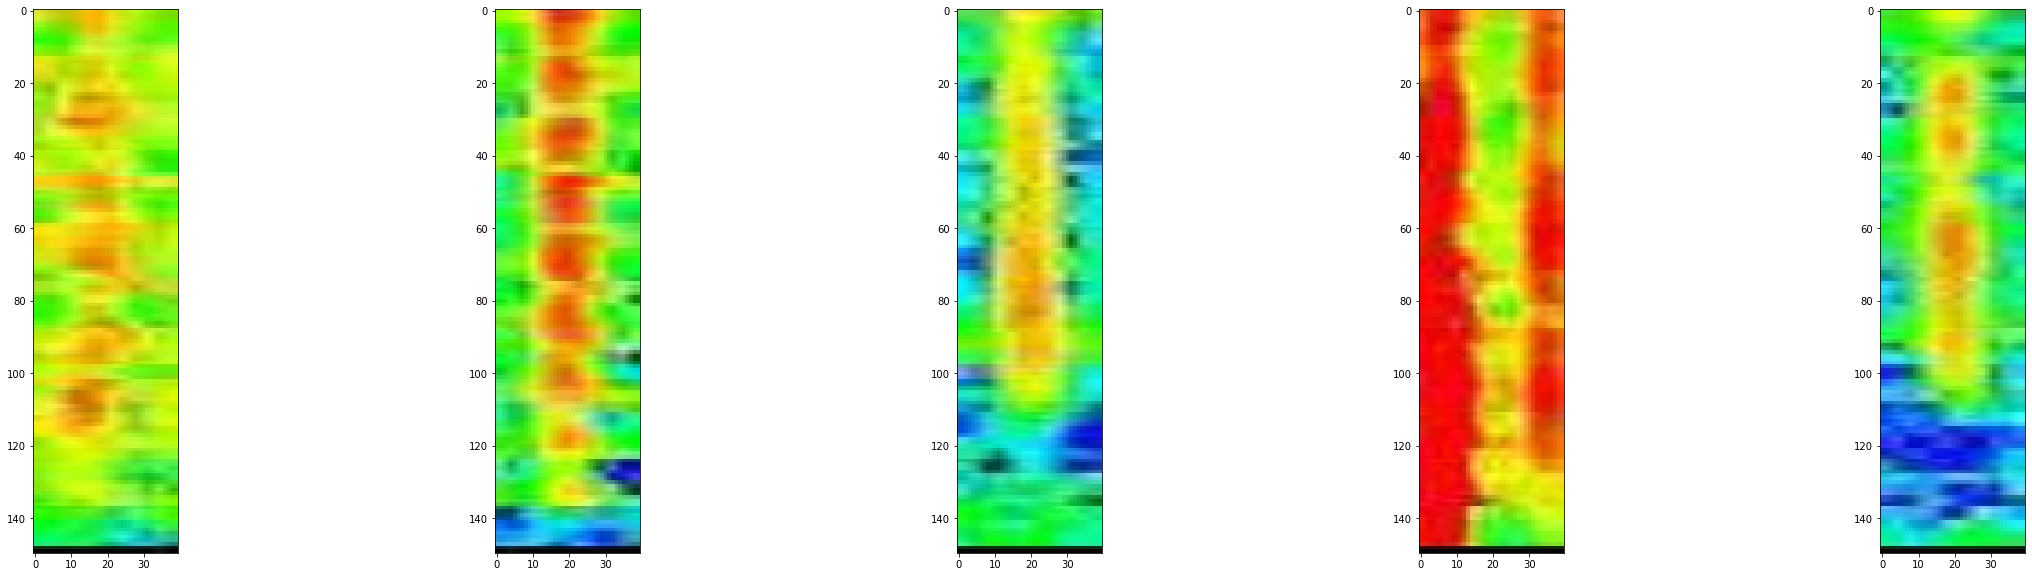

In [9]:
f, ax = plt.subplots(1,5)
f.set_size_inches(40, 10)
for i in range(5):
    ax[i].imshow(som_data[i].reshape(150, 40, 3))
plt.show()

# 3. Vytvorenie SOM mapy

Mapu natrénujeme s s najlepšími parametrami zistenými metódou optimalizácie. Mapu následne vizualizujeme.

In [13]:
x = 5
y = 5
input_len = som_data.shape[1]
sigma = 3.0553534255989145
learning_rate = 4.017791221060744
iterations = 100
seed = 42

data = som_data

In [14]:
som = train_som(x, y, input_len, sigma, learning_rate, seed)

0.25626516342163086  seconds


In [15]:
win_map = som.win_map(data)

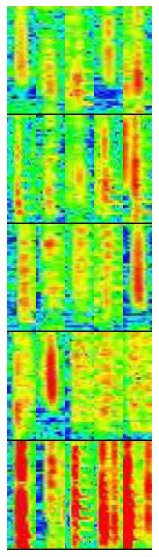

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 10))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(y, x), axes_pad=0)

def place_image(i, img):
    img = img
    grid[i].imshow(img.reshape(150, 40, 3))
    grid[i].axis('off')

to_fill = []
collided = []

for i in range(y*x):
    position = np.unravel_index(i, (y, x))
    if position in win_map:
        img = win_map[position][0]
        collided += win_map[position][1:]
        place_image(i, img)
    else:
        to_fill.append(i)

collided = collided[::-1]
for i in to_fill:
    position = np.unravel_index(i, (y, x))
    img = collided.pop()
    place_image(i, img)
plt.savefig('som_img/som_5_5_cluster.png')
#plt.show()

# 4. Vytvorenie výstupnej tabuľky
Načítame výstupnú tabuľku pre analyzované dáta a pridáme do nej informáciu o zhlukoch.

In [17]:
winner_coordinates = np.array([som.winner(x) for x in data]).T
winner_coordinates.shape

(2, 13647)

In [18]:
#cluster priradenie
som_shape = (x,y)
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
cluster_index

array([18, 18,  0, ...,  0,  7, 10])

In [19]:
np.unique(cluster_index)

array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 17, 18, 19,
       20, 21, 22, 23, 24])

In [20]:
cluster_index.shape

(13647,)

In [21]:
#namapovanie img-cluster
cluster_som_5_5 = pd.DataFrame(list(zip(img_name, cluster_index)), columns =['img', 'cluster'])
cluster_som_5_5

,img,cluster
0,ch2_20141130_010002_554_s12-S3.jpg,18
1,ch2_20141130_185533_304_s41-S2.jpg,18
2,ch2_20141130_071513_250_s80-S6.jpg,0
3,ch2_20141130_161528_669_s90-S2.jpg,24
4,ch2_20141130_001501_274_s119-S3.jpg,0
...,...,...
13642,ch2_20141130_064012_237_s63-S1.jpg,11
13643,ch2_20141130_023005_152_s72-T3.jpg,12
13644,ch2_20141130_173030_842_s80-S6.jpg,0
13645,ch2_20141130_174031_139_s18-S8.jpg,7


In [22]:
#nacitanie vystupnej tabulky
result = pd.read_csv("csv/result_2014_11_cleared.csv")
result

,org_img,image,event,date,second,milisecond,tweek,f_min<2kHz,tweek_sign
0,ch2_20141130_000500_988_s122,ch2_20141130_000500_988_s122-S1.jpg,1,20141130_000500,122,867,0,0,0
1,ch2_20141130_000500_988_s122,ch2_20141130_000500_988_s122-T1.jpg,1,20141130_000500,122,990,1,1,4
2,ch2_20141130_000500_988_s122,ch2_20141130_000500_988_s122-S2.jpg,2,20141130_000500,122,992,0,1,0
3,ch2_20141130_000500_988_s125,ch2_20141130_000500_988_s125-S1.jpg,1,20141130_000500,125,5,0,1,0
4,ch2_20141130_000500_988_s125,ch2_20141130_000500_988_s125-S2.jpg,2,20141130_000500,125,158,0,0,0
...,...,...,...,...,...,...,...,...,...
13651,ch2_20141130_235542_205_s9,ch2_20141130_235542_205_s9-S13.jpg,13,20141130_235542,9,824,0,1,0
13652,ch2_20141130_235542_205_s9,ch2_20141130_235542_205_s9-S14.jpg,14,20141130_235542,9,884,0,0,0
13653,ch2_20141130_235542_205_s9,ch2_20141130_235542_205_s9-S15.jpg,15,20141130_235542,9,916,0,0,0
13654,ch2_20141130_235542_205_s9,ch2_20141130_235542_205_s9-S16.jpg,16,20141130_235542,9,939,0,0,0


In [23]:
#spojenie cluster set-vystupna tabulka
cluster_df = result
cluster_df['cluster'] = cluster_df.image.map(cluster_som_5_5.set_index('img')['cluster'])

In [24]:
cluster_df = cluster_df.dropna()
cluster_df = cluster_df.reset_index()
cluster_df = cluster_df.drop(['index'], axis = 1)
cluster_df['cluster'] = cluster_df['cluster'].astype(int)
cluster_df

,org_img,image,event,date,second,milisecond,tweek,f_min<2kHz,tweek_sign,cluster
0,ch2_20141130_000500_988_s122,ch2_20141130_000500_988_s122-S1.jpg,1,20141130_000500,122,867,0,0,0,0
1,ch2_20141130_000500_988_s122,ch2_20141130_000500_988_s122-T1.jpg,1,20141130_000500,122,990,1,1,4,22
2,ch2_20141130_000500_988_s122,ch2_20141130_000500_988_s122-S2.jpg,2,20141130_000500,122,992,0,1,0,24
3,ch2_20141130_000500_988_s125,ch2_20141130_000500_988_s125-S1.jpg,1,20141130_000500,125,5,0,1,0,12
4,ch2_20141130_000500_988_s125,ch2_20141130_000500_988_s125-S2.jpg,2,20141130_000500,125,158,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
13642,ch2_20141130_235542_205_s9,ch2_20141130_235542_205_s9-S13.jpg,13,20141130_235542,9,824,0,1,0,9
13643,ch2_20141130_235542_205_s9,ch2_20141130_235542_205_s9-S14.jpg,14,20141130_235542,9,884,0,0,0,18
13644,ch2_20141130_235542_205_s9,ch2_20141130_235542_205_s9-S15.jpg,15,20141130_235542,9,916,0,0,0,13
13645,ch2_20141130_235542_205_s9,ch2_20141130_235542_205_s9-S16.jpg,16,20141130_235542,9,939,0,0,0,13


In [25]:
cluster_df.to_csv('som_csv/som5_5_2014_11.csv', index=False)